# CAPSTONE PROJECT
WOMEN CLOTHING E-COMMERCE

Importing libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

Loading the dataset

In [30]:
df = pd.read_csv(r"C:\BIA PY\datasets\Ecom 1 - Arya Chavan\Womens Clothing E-Commerce Reviews.csv")

In [31]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [32]:
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [33]:
df.tail(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23476,23476,522,27,Cheeky!,These bottoms are very cute but defiantly chee...,4,1,0,Initmates,Intimate,Swim
23477,23477,1094,39,Entrancing,I'm so impressed with the beautiful color comb...,4,1,5,General Petite,Dresses,Dresses
23478,23478,1104,32,Unflattering,I was surprised at the positive reviews for th...,1,0,0,General Petite,Dresses,Dresses
23479,23479,1005,42,What a fun piece!,So i wasn't sure about ordering this skirt bec...,5,1,0,General Petite,Bottoms,Skirts
23480,23480,862,35,NaN,NaN,5,1,0,General Petite,Tops,Knits
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


Checking the statistical values of data

In [34]:
df.describe().sum()

Unnamed: 0                 100720.968547
Clothing ID                 28687.417689
Age                         23785.478087
Rating                      23511.306062
Recommended IND             23491.204578
Positive Feedback Count     23620.238138
dtype: float64

Checking the shape of the data

In [35]:
r,c= df.shape
print("Number of rows:", r)
print("Number of columns:", c)

Number of rows: 23486
Number of columns: 11


Checking the null values of the data

In [36]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [37]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

Droping the unwanted coloumns

In [38]:
df=(df.drop(['Unnamed: 0', 'Clothing ID', 'Positive Feedback Count', 'Class Name'],axis = 1))

In [39]:
df.isnull().sum()

Age                   0
Title              3810
Review Text         845
Rating                0
Recommended IND       0
Division Name        14
Department Name      14
dtype: int64

imputing the missing values in department and division coloumns with mode

In [40]:
df['Department Name'].fillna(df['Department Name'].mode()[0], inplace=True)
df['Division Name'].fillna(df['Division Name'].mode()[0], inplace=True)

In [41]:
df.isnull().sum()

Age                   0
Title              3810
Review Text         845
Rating                0
Recommended IND       0
Division Name         0
Department Name       0
dtype: int64

In [42]:
df

,Age,Title,Review Text,Rating,Recommended IND,Division Name,Department Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,General,Tops
...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,General Petite,Dresses
23482,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,General Petite,Tops
23483,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,General Petite,Dresses
23484,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,General,Dresses


In [43]:
df.isnull().sum()

Age                   0
Title              3810
Review Text         845
Rating                0
Recommended IND       0
Division Name         0
Department Name       0
dtype: int64

droping the null values in title and review text rows

In [44]:
df = df.dropna(subset=['Title', 'Review Text'], how='all')

In [45]:
df.isnull().sum()

Age                   0
Title              2966
Review Text           1
Rating                0
Recommended IND       0
Division Name         0
Department Name       0
dtype: int64

In [46]:
df[df.isnull().any(axis=1)]

,Age,Title,Review Text,Rating,Recommended IND,Division Name,Department Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses
11,39,NaN,This dress is perfection! so pretty and flatte...,5,1,General Petite,Dresses
30,33,NaN,Beautifully made pants and on trend with the f...,5,1,General Petite,Bottoms
36,29,NaN,This is a comfortable skirt that can span seas...,4,1,General,Bottoms
...,...,...,...,...,...,...,...
23425,23,NaN,A great long line bra! beautiful and well made...,4,1,Initmates,Intimate
23435,26,NaN,Love the pattern. the pants are really cute! p...,4,1,General Petite,Intimate
23450,40,NaN,I wanted to love this jacket. so soft and grea...,3,0,General,Jackets
23453,39,NaN,"I am 5' 2"" about 118 lbs. thought this fit rea...",4,1,General Petite,Dresses


checking the null values in review text coloumn and drop 

In [47]:
c= df[df['Review Text'].isna()]
print(c)

       Age                    Title Review Text  Rating  Recommended IND  \
10220   30  Such a beautiful dress!         NaN       5                1   

      Division Name Department Name  
10220       General         Dresses  


In [48]:
df = df.dropna(subset=['Review Text'])

In [49]:
df.isnull().sum()

Age                   0
Title              2966
Review Text           0
Rating                0
Recommended IND       0
Division Name         0
Department Name       0
dtype: int64

In [50]:
df

,Age,Title,Review Text,Rating,Recommended IND,Division Name,Department Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,General,Tops
...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,General Petite,Dresses
23482,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,General Petite,Tops
23483,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,General Petite,Dresses
23484,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,General,Dresses


checking the unique values of coloumns named division & department

In [51]:
division_names = df['Division Name'].unique()
department_names = df['Department Name'].unique()

print("Unique Division Names:", division_names)
print("Unique Department Names:", department_names)

Unique Division Names: ['Initmates' 'General' 'General Petite']
Unique Department Names: ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend']


droping the department coloumn as ot contains the same values as division coloumn 

In [52]:
df = df.drop(['Department Name','Title'], axis=1)

In [53]:
df

,Age,Review Text,Rating,Recommended IND,Division Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,General
2,60,I had such high hopes for this dress and reall...,3,0,General
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite
4,47,This shirt is very flattering to all due to th...,5,1,General
...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,1,General Petite
23482,48,"It reminds me of maternity clothes. soft, stre...",3,1,General Petite
23483,31,"This fit well, but the top was very see throug...",3,0,General Petite
23484,28,I bought this dress for a wedding i have this ...,3,1,General


In [54]:
df.isnull().sum()

Age                0
Review Text        0
Rating             0
Recommended IND    0
Division Name      0
dtype: int64

# Data visualization using Matplot lib 

In [55]:
import matplotlib.pyplot as plt

In [59]:
df

,Age,Review Text,Rating,Recommended IND,Division Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,General
2,60,I had such high hopes for this dress and reall...,3,0,General
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite
4,47,This shirt is very flattering to all due to th...,5,1,General
...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,1,General Petite
23482,48,"It reminds me of maternity clothes. soft, stre...",3,1,General Petite
23483,31,"This fit well, but the top was very see throug...",3,0,General Petite
23484,28,I bought this dress for a wedding i have this ...,3,1,General


# Feature engineering

In [60]:
from sklearn.preprocessing import LabelEncoder

Applying Label encoding on Division Name coloumn

In [61]:
division_names = df['Division Name']

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the division names and transform them into labels
encoded_divisions = label_encoder.fit_transform(division_names)
df['Division Name'] = encoded_divisions


In [62]:
df

,Age,Review Text,Rating,Recommended IND,Division Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,2
1,34,Love this dress! it's sooo pretty. i happene...,5,1,0
2,60,I had such high hopes for this dress and reall...,3,0,0
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,1
4,47,This shirt is very flattering to all due to th...,5,1,0
...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,1,1
23482,48,"It reminds me of maternity clothes. soft, stre...",3,1,1
23483,31,"This fit well, but the top was very see throug...",3,0,1
23484,28,I bought this dress for a wedding i have this ...,3,1,0


checking correlation between Dependent and Independent variable

In [63]:
df.corr()

,Age,Rating,Recommended IND,Division Name
Age,1.000000,0.029962,0.034208,-0.027710
Rating,0.029962,1.000000,0.792568,0.023584
Recommended IND,0.034208,0.792568,1.000000,0.020804
Division Name,-0.027710,0.023584,0.020804,1.000000


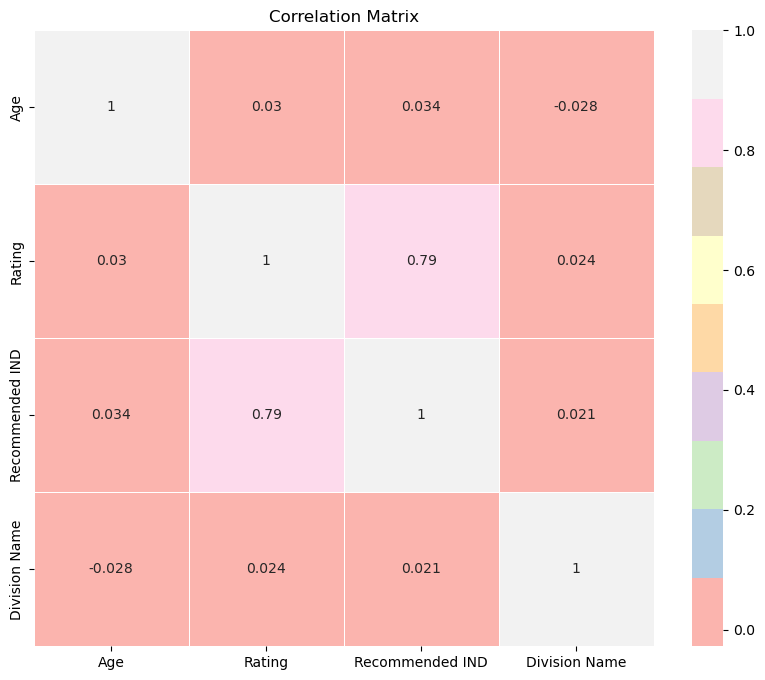

In [64]:
# Assuming your dataset is stored in a variable called 'data'
subset = df[['Age', 'Rating', 'Recommended IND', 'Division Name']]

# Compute the correlation matrix
correlation_matrix = subset.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Applying mapping function on Rating coloumn

In [65]:
df['Rating'] = df['Rating'].map({1: 0, 2: 0, 3: 1, 4: 2, 5: 2})

In [66]:
df

,Age,Review Text,Rating,Recommended IND,Division Name
0,33,Absolutely wonderful - silky and sexy and comf...,2,1,2
1,34,Love this dress! it's sooo pretty. i happene...,2,1,0
2,60,I had such high hopes for this dress and reall...,1,0,0
3,50,"I love, love, love this jumpsuit. it's fun, fl...",2,1,1
4,47,This shirt is very flattering to all due to th...,2,1,0
...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,2,1,1
23482,48,"It reminds me of maternity clothes. soft, stre...",1,1,1
23483,31,"This fit well, but the top was very see throug...",1,0,1
23484,28,I bought this dress for a wedding i have this ...,1,1,0


sorting the Age coloumn

In [67]:
df_age=df.sort_values('Age',ascending = False)

In [68]:
df_age

,Age,Review Text,Rating,Recommended IND,Division Name
11545,99,"Great quality, i didn't expect the neck to be ...",2,1,0
8327,99,I love the weight of the material; sometimes c...,2,1,0
6543,94,Flattering! i love how it looks like a maxi dr...,2,1,0
18563,94,"This dress is very comfortable, not itchy at a...",2,1,0
18036,94,Dress just did not fit will around the hips. ...,0,0,0
...,...,...,...,...,...
7418,19,So i really like this top. not my usual choice...,2,1,1
22364,18,I found this dress on sale in store and i usua...,2,1,0
22390,18,This shirt is incredibly comfortable. the mate...,2,1,0
19704,18,This skirt is absolutely beautiful and is a go...,2,1,0


Checking the Value count of Different Age group in Age Coloumn

In [69]:
(df_age['Age']).value_counts()

39    1226
35     851
36     801
34     766
38     751
      ... 
86       2
90       2
93       2
99       2
92       1
Name: Age, Length: 77, dtype: int64

Applying mapping function on Age coloumn using lambda function

In [70]:
df['Age'] = df['Age'].apply(lambda x: 0 if x in range(18, 45) else (1 if x in range(45, 72) else 2))

In [71]:
df

,Age,Review Text,Rating,Recommended IND,Division Name
0,0,Absolutely wonderful - silky and sexy and comf...,2,1,2
1,0,Love this dress! it's sooo pretty. i happene...,2,1,0
2,1,I had such high hopes for this dress and reall...,1,0,0
3,1,"I love, love, love this jumpsuit. it's fun, fl...",2,1,1
4,1,This shirt is very flattering to all due to th...,2,1,0
...,...,...,...,...,...
23481,0,I was very happy to snag this dress at such a ...,2,1,1
23482,1,"It reminds me of maternity clothes. soft, stre...",1,1,1
23483,0,"This fit well, but the top was very see throug...",1,0,1
23484,0,I bought this dress for a wedding i have this ...,1,1,0


In [72]:
df['Age'].value_counts()

0    13262
1     9053
2      326
Name: Age, dtype: int64

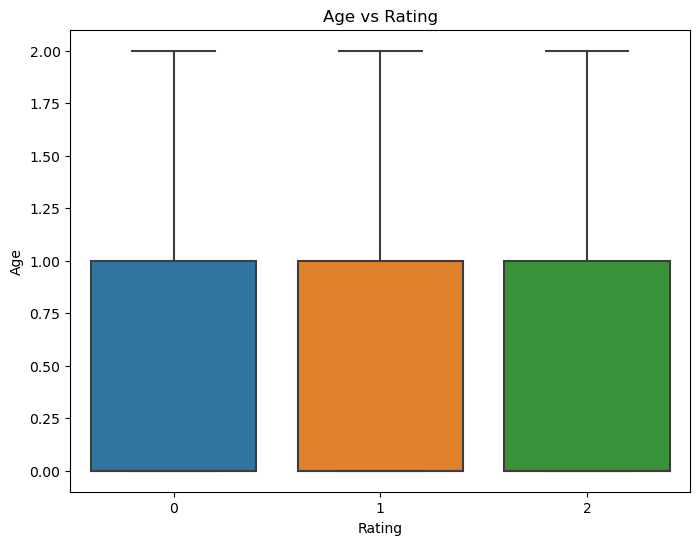

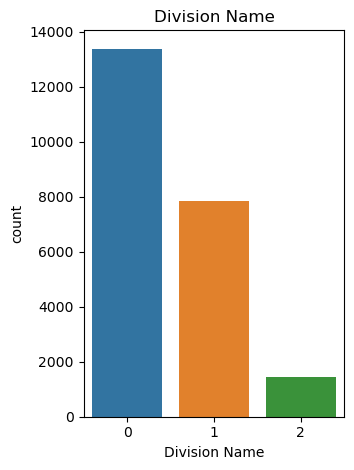

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rating', y='Age', data=df)
plt.title('Age vs Rating')
plt.xlabel('Rating')
plt.ylabel('Age')
plt.show()
# Bar plot of Division Name
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Division Name')
plt.title('Division Name')

plt.tight_layout()
plt.show()

Retriving the unique values in Review text coloumn

In [74]:
df['Review Text'].unique()

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "This fit well, but the top was very see through. this never would have worked for me. i

Removing the Symbols from Review Text coloumn

In [75]:
def remove_symbols(text):
    # Define the regular expression pattern to match symbols
    pattern = r'[^\w\s]'
    # Use the re.sub() function to remove symbols with an empty string
    return re.sub(pattern, '', text)

# Apply the remove_symbols() function to the 'Review Text' column
df['Review Text'] = df['Review Text'].apply(remove_symbols)


In [76]:
df['Review Text'].unique()

array(['Absolutely wonderful  silky and sexy and comfortable',
       'Love this dress  its sooo pretty  i happened to find it in a store and im glad i did bc i never would have ordered it online bc its petite  i bought a petite and am 58  i love the length on me hits just a little below the knee  would definitely be a true midi on someone who is truly petite',
       'I had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper  it c',
       ...,
       'This fit well but the top was very see through this never would have worked for me im glad i was able to try it on in t

# Importing NLTK Model

Importing the Stopwords

In [77]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
stop_words


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aaruc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Removing the stopwords and applying Word Tokenization

In [78]:
def remove_stop(text):
    filtered = []
    tokenized_word = word_tokenize(text) 
    for each_word in tokenized_word:
        if each_word not in stop_words:
            filtered.append(each_word)   
    return(" ".join(filtered))

Removing puntuation mark

In [79]:
nltk.download('punkt')
df['Review Text'] = df['Review Text'].apply(remove_stop)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aaruc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [80]:
df['Review Text']

0              Absolutely wonderful silky sexy comfortable
1        Love dress sooo pretty happened find store im ...
2        I high hopes dress really wanted work initiall...
3        I love love love jumpsuit fun flirty fabulous ...
4        This shirt flattering due adjustable front tie...
                               ...                        
23481    I happy snag dress great price easy slip flatt...
23482    It reminds maternity clothes soft stretchy shi...
23483    This fit well top see never would worked im gl...
23484    I bought dress wedding summer cute unfortunate...
23485    This dress lovely platinum feminine fits perfe...
Name: Review Text, Length: 22641, dtype: object

Applying Stematization 

In [81]:
from nltk.stem.snowball import SnowballStemmer
snow_stem = SnowballStemmer(language='english')

In [82]:
def stem(text):
    filtered = []
    tokenized_word = word_tokenize(text)
    for each_word in tokenized_word:
         filtered.append(snow_stem.stem(each_word))  
    return(" ".join(filtered))
df['Review Text'] = df['Review Text'].apply(stem)

In [83]:
df.head()

,Age,Review Text,Rating,Recommended IND,Division Name
0,0,absolut wonder silki sexi comfort,2,1,2
1,0,love dress sooo pretti happen find store im gl...,2,1,0
2,1,i high hope dress realli want work initi order...,1,0,0
3,1,i love love love jumpsuit fun flirti fabul eve...,2,1,1
4,1,this shirt flatter due adjust front tie perfec...,2,1,0


Applying CountVectorizer on Review Text

In [84]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review Text'])
y = df['Recommended IND']

In [85]:
X[0]

<1x14636 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

# Training the model

In [86]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
# Training the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [88]:
# Making predictions on the testing set
y_pred = nb.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [89]:
# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8750184012954512
Confusion Matrix:
 [[ 693  554]
 [ 295 5251]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.56      0.62      1247
           1       0.90      0.95      0.93      5546

    accuracy                           0.88      6793
   macro avg       0.80      0.75      0.77      6793
weighted avg       0.87      0.88      0.87      6793



Accuracy: 0.8750184012954512

The accuracy of the model is measured at 0.8750184012954512, which means it correctly predicts the class of the data 87.5% of the time.
Confusion Matrix:

A confusion matrix is used to evaluate the performance of a classification model.
The confusion matrix is represented as a table with four values: true positive (693), false positive (554), false negative (295), and true negative (5251).
The confusion matrix shows the number of correct and incorrect predictions made by the model.
Classification Report:

The classification report provides a summary of the model's performance for each class.
Precision: The precision score represents the accuracy of the positive predictions (1) made by the model. A precision score of 0.90 for class 1 indicates that 90% of the positive predictions made by the model were correct.
Recall: The recall score represents the proportion of actual positives (1) that were correctly identified by the model. A recall score of 0.95 for class 1 indicates that 95% of the actual positive cases were correctly identified by the model.
F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A higher F1-score indicates a better balance between precision and recall.
Support: The support is the number of samples of the true response that lie in that class.
Overall, the model has a high accuracy and performs well in classifying both class 0 and class 1.